In [2]:
# Basic modules
import numpy as np 
import pandas as pd 
import os

# Tensorflow and OpenCV
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import cv2

# Plotting and graphing
import matplotlib.pyplot as plt
%matplotlib inline

# Tensorflow model building
from tensorflow import keras
from tensorflow.keras import layers

# Dataset manipulation
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Getting the dataset path from .env
from dotenv import load_dotenv
import os
load_dotenv()

# For saving the Model
import pickle



In [4]:
# Parameters for the loader
batch_size = 16
img_height = 300
img_width = 300

data_directory = os.getenv("DATA_DIRECTORY_PATH")
# data_directory = r"D:\8th-sem-project\bloodcells_dataset"

In [3]:
# First load the training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_directory,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 17092 files belonging to 8 classes.
Using 13674 files for training.


In [5]:
# Next load the validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_directory,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 17092 files belonging to 8 classes.
Using 3418 files for validation.


In [10]:
class_names = val_ds.class_names
print(class_names)

['basophil', 'eosinophil', 'erythroblast', 'ig', 'lymphocyte', 'monocyte', 'neutrophil', 'platelet']


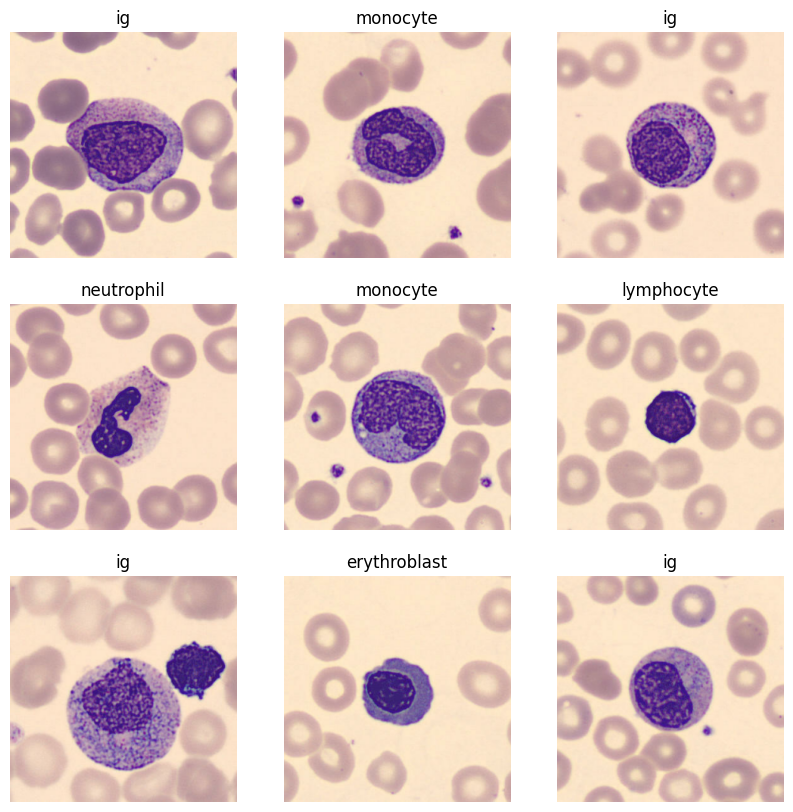

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [7]:
# Tap into the shape of a single batch of data
for image_batch, label_batch in train_ds:
    print(image_batch.shape)
    print(label_batch.shape)
    break

(16, 300, 300, 3)
(16,)


In [8]:
num_classes = len(class_names)

# Using sequential model
model = tf.keras.Sequential([
    keras.Input(shape=(300, 300, 3)),
    # Here is the rescaling layer which we use to normalize the input
    keras.layers.Rescaling(1./255),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(num_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 300, 300, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 73, 73, 32)        0

In [9]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [10]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10


855/855 [==============================] - 947s 1s/step - loss: 1.3527 - accuracy: 0.5891 - val_loss: 1.0392 - val_accuracy: 0.6106
Epoch 2/10
855/855 [==============================] - 913s 1s/step - loss: 0.7004 - accuracy: 0.7597 - val_loss: 1.1037 - val_accuracy: 0.6179
Epoch 3/10
855/855 [==============================] - 874s 1s/step - loss: 0.5122 - accuracy: 0.8207 - val_loss: 0.8008 - val_accuracy: 0.7145
Epoch 4/10
855/855 [==============================] - 867s 1s/step - loss: 0.3648 - accuracy: 0.8743 - val_loss: 1.2859 - val_accuracy: 0.6246
Epoch 5/10
855/855 [==============================] - 844s 987ms/step - loss: 0.2821 - accuracy: 0.9039 - val_loss: 0.8213 - val_accuracy: 0.7300
Epoch 6/10
855/855 [==============================] - 836s 978ms/step - loss: 0.2099 - accuracy: 0.9238 - val_loss: 0.6646 - val_accuracy: 0.7961
Epoch 7/10
855/855 [==============================] - 852s 996ms/step - loss: 0.1302 - accuracy: 0.9540 - val_loss: 0.9567 - val_accuracy: 0.7607
E

In [11]:
pickle.dump(model , open(r"D:\8th-sem-project\bloodcells_dataset\leukocyte_model" , "wb"))

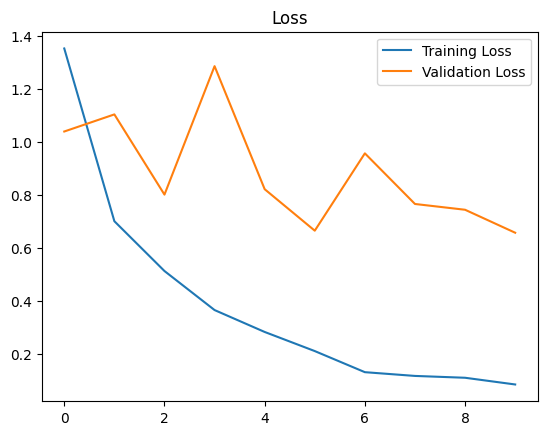

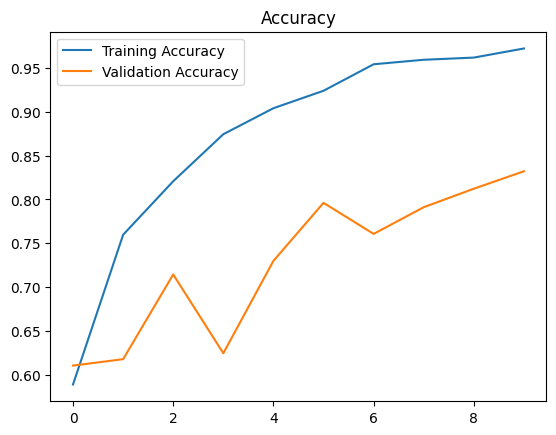

In [14]:
history = model.history.history

train_loss = history['loss']
val_loss = history['val_loss']
train_acc = history['accuracy']
val_acc = history['val_accuracy']

# Loss
plt.figure()
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

# Accuracy
plt.figure()
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [14]:
# Grab a batch of data
leukocyte_model = pickle.load(open(r"D:\8th-sem-project\bloodcells_dataset\leukocyte_model" , "rb"))
for images, labels in val_ds.take(1):
    eval_images = images.numpy()
    eval_labels = labels.numpy()

# Evaluate model
score = leukocyte_model.evaluate(eval_images, eval_labels, verbose = 0) 

print('Validation Accuracy:', score[1])

Validation Accuracy: 0.8125


1/1 [==============================] - 0s 295ms/step


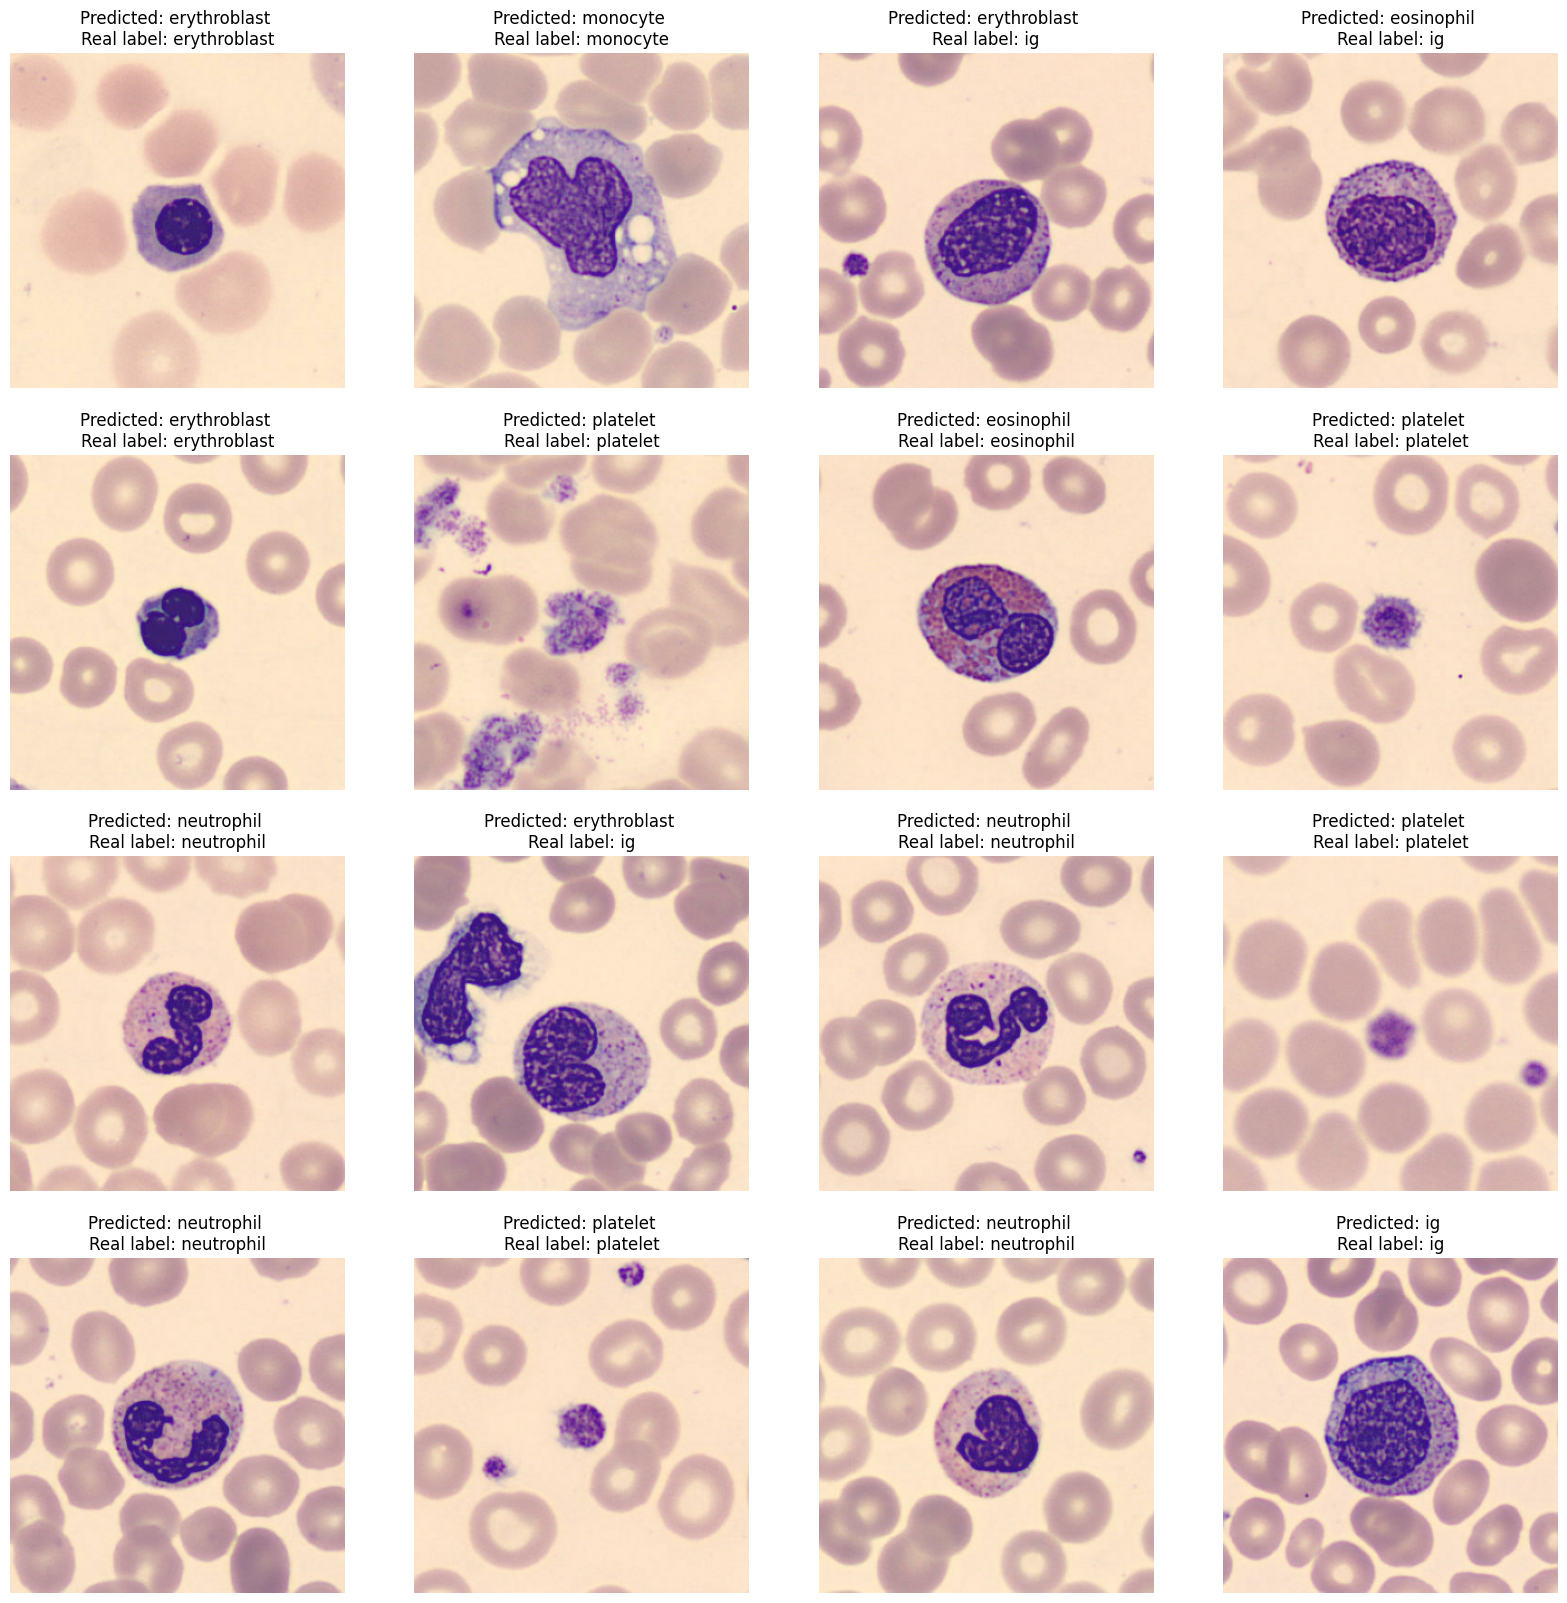

In [15]:
plt.figure(figsize=(20, 20))

# Generate predictions
predictions = leukocyte_model.predict(eval_images)
predicted_indexes = np.argmax(predictions, axis=1)
        

for i in range(16):
    ax = plt.subplot(4, 4, i + 1)

    # Show image
    plt.imshow(eval_images[i].astype("uint8"))

    # Predicted class
    predicted_class = class_names[predicted_indexes[i]]

    # Real class
    real_class = class_names[eval_labels[i]]

    # Title 
    plt.title(f'Predicted: {predicted_class} \nReal label: {real_class}')

    plt.axis("off")